In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [25]:
img = plt.imread("assets/komodo.jpg")
img.shape

(240, 320, 3)

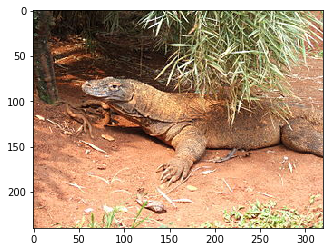

In [26]:
plt.imshow(img)

## Buat tiap pixel jadi data

In [27]:
img = img.reshape(-1, 3)
img

array([[ 50,  62,  42],
       [ 98, 107,  88],
       [101, 105,  90],
       ...,
       [249, 255, 205],
       [207, 213, 169],
       [149, 143, 111]], dtype=uint8)

In [28]:
len(img) # total pixel

76800

In [29]:
len(np.unique(img, axis=0)) # total unique color

49318

## Cluster 62643 colors into 8 color palette

In [30]:
kmeans = KMeans(n_clusters=8, random_state=42, n_jobs=-1)
labels = kmeans.fit_predict(img)

In [31]:
labels

array([7, 3, 3, ..., 2, 5, 6], dtype=int32)

In [32]:
palette = kmeans.cluster_centers_.astype(int)
palette

array([[182, 175, 133],
       [ 45,  29,  17],
       [243, 234, 196],
       [132,  97,  65],
       [222, 158, 120],
       [245, 192, 151],
       [174, 128,  93],
       [ 88,  62,  39]])

In [33]:
quantized_img = palette[labels].reshape(240, 320, 3)
quantized_img

array([[[ 88,  62,  39],
        [132,  97,  65],
        [132,  97,  65],
        ...,
        [174, 128,  93],
        [245, 192, 151],
        [182, 175, 133]],

       [[132,  97,  65],
        [132,  97,  65],
        [132,  97,  65],
        ...,
        [174, 128,  93],
        [174, 128,  93],
        [243, 234, 196]],

       [[132,  97,  65],
        [ 45,  29,  17],
        [ 45,  29,  17],
        ...,
        [174, 128,  93],
        [132,  97,  65],
        [182, 175, 133]],

       ...,

       [[174, 128,  93],
        [174, 128,  93],
        [132,  97,  65],
        ...,
        [243, 234, 196],
        [243, 234, 196],
        [243, 234, 196]],

       [[174, 128,  93],
        [222, 158, 120],
        [174, 128,  93],
        ...,
        [243, 234, 196],
        [243, 234, 196],
        [174, 128,  93]],

       [[222, 158, 120],
        [222, 158, 120],
        [174, 128,  93],
        ...,
        [243, 234, 196],
        [245, 192, 151],
        [174, 128,  93]]

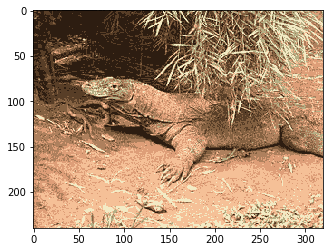

In [34]:
plt.imshow(quantized_img)

In [35]:
def quantize(img, n_palette):
    n_unique = len(np.unique(img.reshape(-1, 3), axis=0))
    
    kmeans = KMeans(n_clusters=n_palette, random_state=42, n_jobs=-1)
    labels = kmeans.fit_predict(img.reshape(-1, 3))
    pallete = kmeans.cluster_centers_.astype(int)
    quantized_img = pallete[labels].reshape(*img.shape)
    
    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    plt.imshow(img)
    plt.title(f"Original Image [{n_unique} colors]")
    plt.xticks([]); plt.yticks([])
    
    plt.subplot(122)
    plt.imshow(quantized_img)
    plt.title(f"Quantized Image [{n_palette} colors]")
    plt.xticks([]); plt.yticks([])

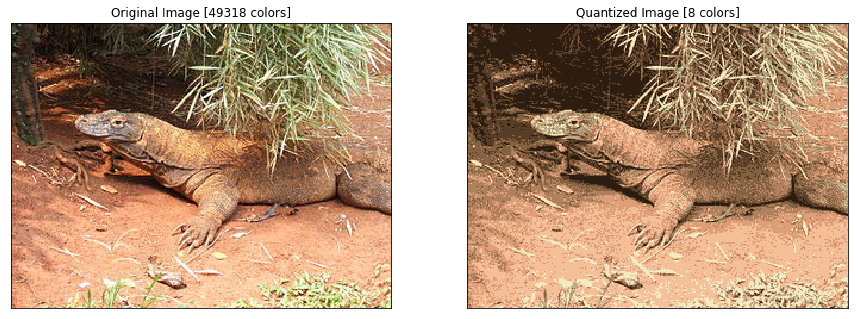

In [36]:
img = plt.imread("assets/komodo.jpg")
quantize(img, 8)

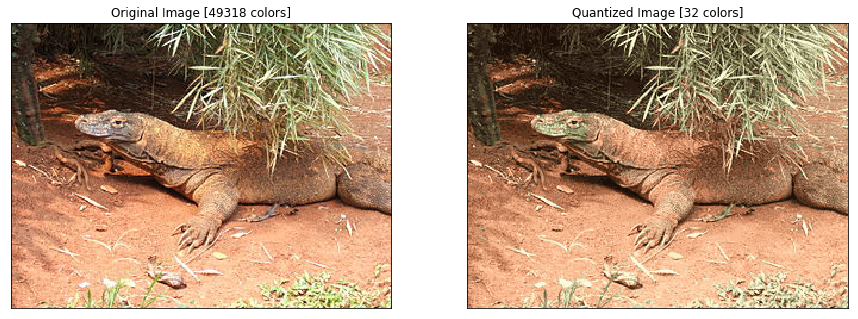

In [39]:
img = plt.imread("assets/komodo.jpg")
quantize(img, 32)

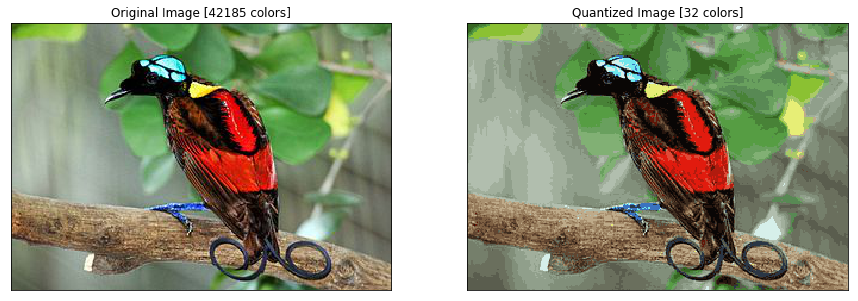

In [40]:
img = plt.imread("assets/cendrawasih_botak.jpg")
quantize(img, 32)

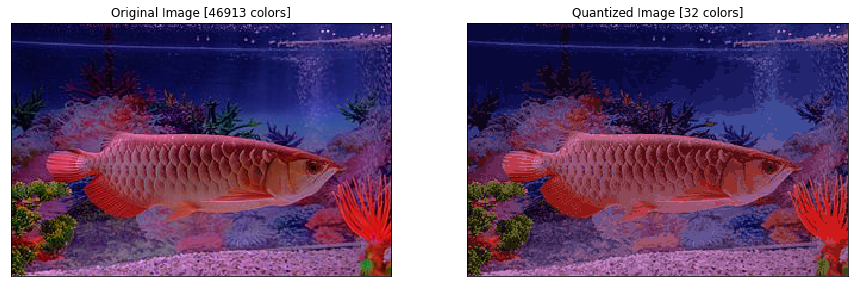

In [41]:
img = plt.imread("assets/arwana_merah.jpg")
quantize(img, 32)

# Compression Math (Opsional)

Original Image
- 100x100x3 RGB
- `(100*100)*(3*8bit) = 240.000 bit = 30 KB`

Compressed Image (32 palette)
- 100x100 label + 32x3 RGB
- `(100*100*4bit) + (32*3*8bit) = 40.768 bit = 5 KB`